**Chapter 6 – Decision Trees**

_This notebook is taken/adopted from Aurélien Géron's chapter 6._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline:

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Training and visualizing
This section illustrates the use of decision tree to classify Iris plant type based on flower measurements: sepal length, sepal width, petal length and petal width in cm. 

Note the data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant: Iris Setosa, Iris Versicolour and Iris Virginica.

More information about Iris dataset can be found at https://archive.ics.uci.edu/ml/datasets/iris

In [0]:
from sklearn.datasets import load_iris            # load iris data
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # use only 2 features of petal length and width in this example, so we can visualise results in 2-d.
y = iris.target

# for how to use DecisionTreeClassifier, see https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)   # learn a tree with maximum depth of 3, use default values for other parameters
tree_clf.fit(X, y)

Display the tree

In [0]:
from sklearn import tree
tree.plot_tree(tree_clf, 
               feature_names=["Petal length", "Petal width"], 
               class_names=['Setosa', 'Versicolour', 'Virginica'], 
               impurity=False, filled=True, rounded=True)

Show decision boundary

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)            # generate 100 x 100 data points in [0, 7.5] x [0, 3]
    X_new = np.c_[x1.ravel(), x2.ravel()]     # re-arrange as 2-d data
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

# Exercise
This exercise practices model hyperparameter selection/optimisation which is usually required in machine learning tasks.

Change values of the following parameters of DecisionTreeClassifier to see how the learned tress differ:

*   max_depth:          3, 4, default
*   min_samples_split:  3, 4, 5, default
*   min_samples_leaf:   2, 3, 4, default

See https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html for information about these parameters. 





# Predicting classes and class probabilities

In [0]:
tree_clf.predict_proba([[5, 1.5]])        # predict the class probability of a data point [5, 1.5]

In [0]:
tree_clf.predict([[5, 1.5]])              # predict the class of a data point [5, 1.5]

# Sensitivity to training set details

DT is **sensitive to small variations** in the training data. This code demonstrate this by removing the sample of the widest Iris-Versicolor from the training data

In [0]:
x1_max = X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower
x1_max[0][1]

In [0]:
#not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
not_widest_versicolor = (X[:, 1] != x1_max[0][1]) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)
tree.plot_tree(tree_clf_tweaked, 
               feature_names=["Petal length", "Petal width"], 
               class_names=['Setosa', 'Versicolour', 'Virginica'], 
               impurity=False, filled=True, rounded=True)

In [0]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

Another example on Moon data to demonstrate **regularization** using min_samples_leaf.

This code learns 2 trees: one with default value, i.e., min_samples_leaf = 1, another with min_samples_leaf = 4. A larger value of min_samples_leaf regularises the growing of a tree to get a less complex tree.

In [0]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# Two trees with different parameters for the minimum number of samples in leaf nodes, default=1
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)                        # tree 1, default min_samples_leaf=1, may overfitting
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)    # tree 2
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

A bit processing of Iris data by rotation.

Rotate the Iris data by pi / 180 * 20, rotation matrix  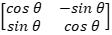

In [0]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

One more example on the effect of **data orientation**.

In [0]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5           # generate a 2-d data in the range of [-0.5, 0.5]
ys = (Xs[:, 0] > 0).astype(np.float32) * 2  # make it 2 classes

angle = np.pi / 4                           # roate the data by 45 degree
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)    # classifier for the un-rotated data
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)   # classifier for the rotated data
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

# Regression trees

In [0]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)
tree.plot_tree(tree_reg, 
               feature_names=["X1"], 
               filled=True, rounded=True)

In [0]:
from sklearn.tree import DecisionTreeRegressor

# learn 2 trees with different depth
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

Illustration of overfitting and regularisation

Limit tree complexity using min_samples_leaf: 1 (default), 10 (a more regularised)

In [0]:
tree_reg1 = DecisionTreeRegressor(random_state=42)    # default value for min_samples_leaf=1
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()